In [2]:
from specpy import *
from Util.coordinates import *
from Util.datastructures import *
from Util.tile_util import *
from Util.imspector_util import *
from Util.dot_detection.Fiji_coordinate_detection import *
from Util.coordinate_util import *
from Util.dot_detection.Fiji_dummy import *
from Util.dot_detection.Fiji_coordinate_detection import read_coords
im = Imspector()
#im.create_measurement()
ms = im.active_measurement()
import pprint
params = ms.parameters()

from Util import datastructures, imspector_util
import time
from matplotlib import pyplot as plt
from skimage.feature import blob_dog, blob_log, blob_doh
%matplotlib inline

In [3]:
def find_blobs(ms, series=0):
    dta = ms.stack(series).data()[0,0,:,:]
    blbs = blob_log(dta, max_sigma=30, num_sigma=10, threshold=0.02)
    res = []
    for b in blbs:
        res.append([b[1], b[0]])
    return res

#in coordinate util included

[[198.0, 1.0], [71.0, 2.0], [18.0, 13.0], [60.0, 14.0], [22.0, 15.0], [8.0, 22.0], [115.0, 22.0], [24.0, 35.0], [0.0, 38.0], [7.0, 51.0], [43.0, 53.0], [0.0, 55.0], [25.0, 60.0], [28.0, 66.0], [101.0, 78.0], [88.0, 92.0], [152.0, 99.0], [58.0, 105.0], [0.0, 113.0], [80.0, 129.0], [17.0, 137.0], [21.0, 148.0], [27.0, 148.0], [69.0, 151.0], [37.0, 172.0], [165.0, 176.0], [91.0, 177.0], [110.0, 182.0], [24.0, 184.0], [41.0, 190.0], [38.0, 192.0], [103.0, 192.0], [141.0, 195.0], [20.0, 199.0], [55.0, 199.0]]


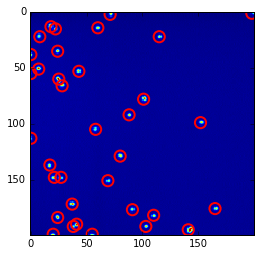

In [52]:
blbs = find_blobs(ms)
p = plt.imshow(ms.stack(0).data()[0,0,:,:], interpolation='nearest')
print(find_blobs(ms))
for blb in blbs:
    x, y = blb
    c = plt.Circle((x, y), 5, color='red', linewidth=2, fill=False)
    p.axes.add_patch(c)

In [2]:
#s.load_from_file('C://Users//RESOLFT//Desktop//test.json')


imspector_util.acquire_measurement(im, ms, 'C://Users//RESOLFT//Desktop//test.json', 'C://Users//RESOLFT//Desktop//', 'aaaaaa', '1')

In [29]:
#print(s)
s.apply_to_settings_dict(params)
#for k,v in s.settings.items():
#    print(type(v))

In [10]:
ms.set_parameters(params)

RuntimeError: No parameters for device 'is_active'

In [22]:
for offset in [1e-5, 2e-5, 3e-5]:
    time.sleep(1)
    s["OlympusIX/scanrange/x/offset"] = offset
    paramsI = ms.parameters()
    s.apply_to_settings_dict(paramsI)
    ms.set_parameters(paramsI)

In [3]:
benc = [1.23e-06, 2.2e-06, 0]
co.set_bench_coords(benc)
see = Settings()

In [4]:
see.set_to_coordinates(co)
print(see.settings)
see.apply_to_settings_dict(params)

{'ExpControl/scan/range/x/len': 0, 'ExpControl/scan/range/y/len': 0, 'OlympusIX/scanrange/y/offset': 2.2e-06, 'ExpControl/scan/range/x/off': 0, 'OlympusIX/scanrange/z/off': 0, 'ExpControl/scan/range/z/off': 0, 'OlympusIX/scanrange/x/offset': 1.23e-06, 'ExpControl/scan/range/y/off': 0, 'ExpControl/scan/range/z/len': 0}


In [3]:
ms.set_parameter("OlympusIX/light_path/objlens", "10X_NA1.4_oil_UPLSAPO100XO")

In [ ]:
'''
TODO: maybe implement smthng like that
def check_paramters(params, defaults):
    check_coordinates_valid(get_stage_goordinates(params), defaults.min_stage, defaults.Max_stage)
    
def set_parameters_safe(params, ms):
    if (check_parameters(params)):
        ms.set_parameters(params)
    else:
        raise Exception('Do not want')
'''

In [5]:
### TEST check coords
check_coordinates_valid([1.00000001,1], [-1,-1], [1,1])
(1,2) + tuple([1])

(1, 2, 1)

In [4]:
params = ms.parameters()
see = Settings()
coords = generate_grid_oop([0,0], [1e-3, 1e-3], [2e-4, 2e-4])

for c in coords[:5]:
    see.set_to_coordinates(c)
    acquire_measurement_dummy(im, see)

In [4]:
# Lests try this:
#params = ms.parameters()
see = Settings()
see.load_from_file('./gbtest.json')
coords = generate_grid_oop([0,0],[2e-3, 2e-3], [2e-5, 2e-5])
for c in coords:
    # why is there an extra gov setter
    c.set_fov_len([1e-05, 1e-05, 0])

for c in coords:
    see.set_to_coordinates(c)
    #ms.set_parameter("OlympusIX/light_path/objlens", "10X_NA1.4_oil_UPLSAPO100XO")
    acquire_measurement_dummy(im, see)
    ms = im.active_measurement()
    #do_dummy_stuff(get_fov_dims_pixel(ms))
    #spots = read_coords("./Util/dot_detection/coords-temp")
    co = c.copy()
    spots = find_blobs(ms)
    # is scan offset = offset + bench?
    corner = middle2corner(c.get_scan_offset(), c.get_fov_len())
    pixelsd = get_pixel_dimensions(ms)
    actual_coords = corner2spot(corner, spots, pixelsd)
    for i in actual_coords:
        co.set_fov_len([2e-06, 2e-06, 0])
        co.set_offset_coords(i)
        see.set_to_coordinates(co)
        acquire_measurement_dummy(im, see)

KeyboardInterrupt: 

In [3]:
corner2spot([-5e-06, -5e-06, 0.0] ,[(39.37, 5.21), (12.98, 71.61), (20.5, 46.7)], (1e-07, 1e-07))

[-5e-06, -5e-06, 0.0] [(39.37, 5.21), (12.98, 71.61), (20.5, 46.7)] (1e-07, 1e-07)


[[-1.0630000000000007e-06, -4.479000000000001e-06],
 [-3.7020000000000003e-06, 2.1609999999999993e-06],
 [-2.9500000000000006e-06, -3.3000000000000023e-07]]

In [3]:
a = read_coords("./Util/dot_detection/coords-temp")
for i in map(float, a):
    print(i)

TypeError: float() argument must be a string or a number, not 'tuple'

In [3]:
#Debug TEST
#see = Settings()
#see.load_from_file('./atest.json')
#ms = im.active_measurement()
#coords = generate_grid_oop([0,0],[2e-3, 2e-3], [2e-3, 2e-3])
#for c in coords:
#    c.set_fov_len([2e-03, 2e-03, 0])
    
#for c in coords:
    #bench = str(c.get_bench_coords())
    #print("bench coords are:" + bench)
    #print("---------                           -------------------------")
    #fov = str(c.get_fov_len())
    #print("fov is:" + fov)
    #print("-------                             --------------------------- ")
    #see.set_to_coordinates(c)

   
    #do_dummy_stuff(get_fov_dims_pixel(ms))
    #spots = read_coords("coords-temp")
    #print(spots)
    #print("------------------                       -------------------")
    #co = c.copy()
    #corner = middle2corner(c.get_bench_coords(), c.get_fov_len())
    #print("corner is:")
    #print(corner)
    #pixelsd = get_pixel_dimensions(ms)
    #print("pixelsd is ")
    #print(pixelsd)
    #actual_coords = corner2spot(corner, spots, pixelsd)
    #print(actual_coords)
    #print("------------------------------a----------------------------")

In [2]:
see = Settings()
see.load_from_file('./gbtest.json')
coords = generate_grid_oop([0,0],[2e-3, 2e-3], [2e-5, 2e-5])
for c in coords:
    c.set_fov_len([2e-05, 2e-05, 0])
    
for c in coords:
    see.set_to_coordinates(c)
    i  = str(random.randint(0, 10000000000000000))
    name = ('test'+i+'.msr')
    acquire_measurement_dummy(im, see, name)
    ms = im.active_measurement()
    call_fiji('C:/Users//RESOLFT/Desktop//Fiji.app/ImageJ-win64.exe --console', 'Util/dot_detection/Macro.py', ('28_06'+name))
    sites = read_coords('./Util/dot_detection/coords-temp')
    co = c.copy()
    corner = middle2corner(c.get_all_in_one_offset(), c.get_fov_len())
    pixelsd = get_pixel_dimensions(ms)
    actual_coords = corner2spot(corner, sites, pixelsd)
    print(sites)
    for i in sites:
        see.set_to_coordinates(i)
        c.set_fov_len([2e-06, 2e-06, 0])
        i  = str(random.randint(0, 10000000000000000))
        name = ('testerinio'+i+'.msr')
        acquire_measurement_dummy(im, see, name)

[]


KeyboardInterrupt: 